# ALICE's Heatbeat

This is a toy example of time-series anomaly prediction, using electrocardiogram data. A Recurrent neural network with Long Short-Term Memory (LSTM) is trained to forecast future behaviour and an Auto-encoder neural network is used to detect anomalies on the forecast. The aim is to detect anomalous behaviour in time-series data before it happens.

The proposed application of this technique is for time-series measurements of the detector sub-systems on the ALICE experiment at the LHC. From 2021, the upgraded experiment will perform in both a 'standard trigger' and 'heartbeat trigger', with a continuous read-out of collisions. Periodic behaviour is expected from various sub-systems in such a paradigm.

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

In [2]:
disease_person_1_data = os.getcwd() + '/disease_person1.csv'
disease_person1 = pd.read_csv(disease_person_1_data)
disease_person_1 = np.array(disease_person1)
disease_person_1 = disease_person_1[2:,:]
disease_person_1 = disease_person_1[:,1]
disease_person_1 = disease_person_1.astype(np.float)

max_value_disease_person_1 = max(disease_person_1)
for i in range(len(disease_person_1)):
    disease_person_1[i] = disease_person_1[i] / max_value_disease_person_1

disease_person_2_data = os.getcwd() + '/disease_person2.csv'
disease_person2 = pd.read_csv(disease_person_2_data)
disease_person_2 = np.array(disease_person2)
disease_person_2 = disease_person_2[2:,:]
disease_person_2 = disease_person_2[:,1]
disease_person_2 = disease_person_2.astype(np.float)

max_value_disease_person_2 = max(disease_person_2)
for i in range(len(disease_person_2)):
    disease_person_2[i] = disease_person_2[i] / max_value_disease_person_2

disease_person_3_data = os.getcwd() + '/disease_person3.csv'
disease_person3 = pd.read_csv(disease_person_3_data)
disease_person_3 = np.array(disease_person3)
disease_person_3 = disease_person_3[2:,:]
disease_person_3 = disease_person_3[:,1]
disease_person_3 = disease_person_3.astype(np.float)

max_value_disease_person_3 = max(disease_person_3)
for i in range(len(disease_person_3)):
    disease_person_3[i] = disease_person_3[i] / max_value_disease_person_3

healthy_person_1_data = os.getcwd() + '/healthy_person1.csv'
healthy_person1 = pd.read_csv(healthy_person_1_data)
healthy_person_1 = np.array(healthy_person1)
healthy_person_1 = healthy_person_1[2:,:]
healthy_person_1 = healthy_person_1[:,1]
healthy_person_1 = healthy_person_1.astype(np.float)

max_value_healthy_person_1 = max(healthy_person_1)
for i in range(len(healthy_person_1)):
    healthy_person_1[i] = healthy_person_1[i] / max_value_healthy_person_1

healthy_person_2_data = os.getcwd() + '/healthy_person2.csv'
healthy_person2 = pd.read_csv(healthy_person_2_data)
healthy_person_2 = np.array(healthy_person2)
healthy_person_2 = healthy_person_2[2:,:]
healthy_person_2 = healthy_person_2[:,1]
healthy_person_2 = healthy_person_2.astype(np.float)

max_value_healthy_person_2 = max(healthy_person_2)
for i in range(len(healthy_person_2)):
    healthy_person_2[i] = healthy_person_2[i] / max_value_healthy_person_2

healthy_person_3_data = os.getcwd() + '/healthy_person3.csv'
healthy_person3 = pd.read_csv(healthy_person_3_data)
healthy_person_3 = np.array(healthy_person3)
healthy_person_3 = healthy_person_3[2:,:]
healthy_person_3 = healthy_person_3[:,1]
healthy_person_3 = healthy_person_3.astype(np.float)

max_value_healthy_person_3 = max(healthy_person_3)
for i in range(len(healthy_person_3)):
    healthy_person_3[i] = healthy_person_3[i] / max_value_healthy_person_3

healthy_person_4_data = os.getcwd() + '/healthy_person4.csv'
healthy_person4 = pd.read_csv(healthy_person_4_data)
healthy_person_4 = np.array(healthy_person4)
healthy_person_4 = healthy_person_4[2:,:]
healthy_person_4 = healthy_person_4[:,1]
healthy_person_4 = healthy_person_4.astype(np.float)

max_value_healthy_person_4 = max(healthy_person_4)
for i in range(len(healthy_person_4)):
    healthy_person_4[i] = healthy_person_4[i] / max_value_healthy_person_4

In [3]:
dataset2 = np.append(healthy_person_1,healthy_person_2)
dataset2 = np.append(dataset2,healthy_person_3)
dataset2 = np.append(dataset2,healthy_person_4)

# Plot data:

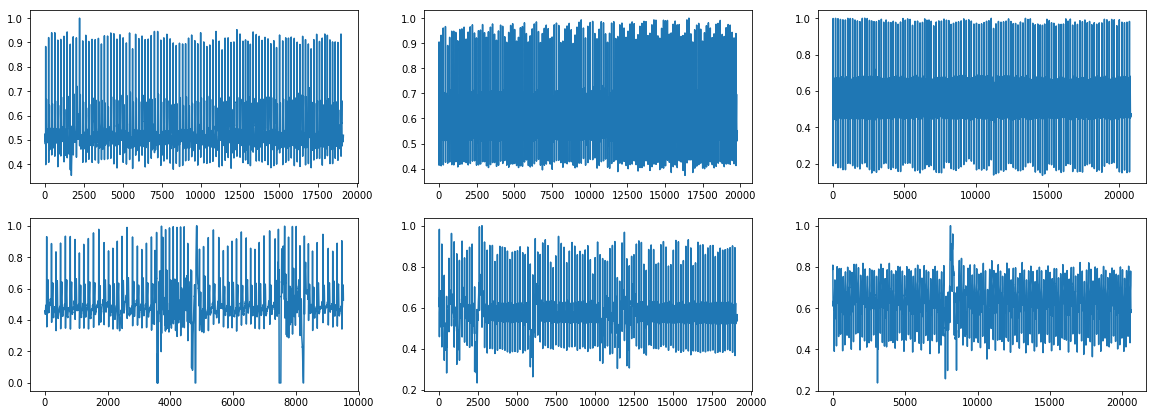

In [4]:
f, ax = plt.subplots(2, 3, figsize=(20,7))

ax[0,0].plot(healthy_person_2)
ax[0,1].plot(healthy_person_3)
ax[0,2].plot(healthy_person_4)

ax[1,0].plot(disease_person_1)
ax[1,1].plot(disease_person_2)
ax[1,2].plot(disease_person_3)

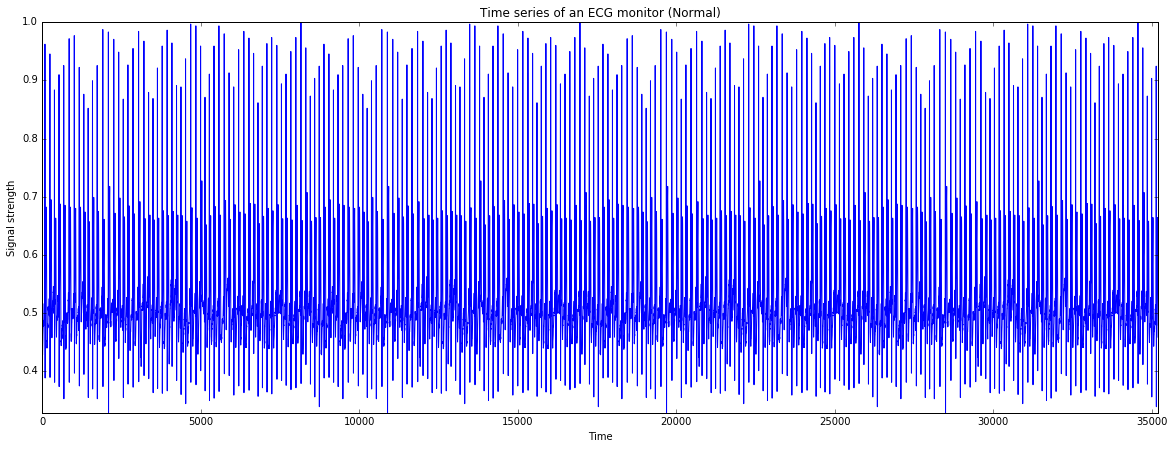

In [3]:
dataset_normal = np.append(np.append(np.append(healthy_person_1,healthy_person_1),healthy_person_1),healthy_person_1)

plt.figure(figsize=(20, 7))
axes1 = plt.gca()
axes1.set_xlim([0,len(dataset_normal)])
axes1.set_ylim([min(dataset_normal),max(dataset_normal)])
plt.plot(dataset_normal, 'b')
plt.title("Time series of an ECG monitor (Normal)")
plt.xlabel('Time')
plt.ylabel('Signal strength')

Text(0,0.5,u'Signal strength')

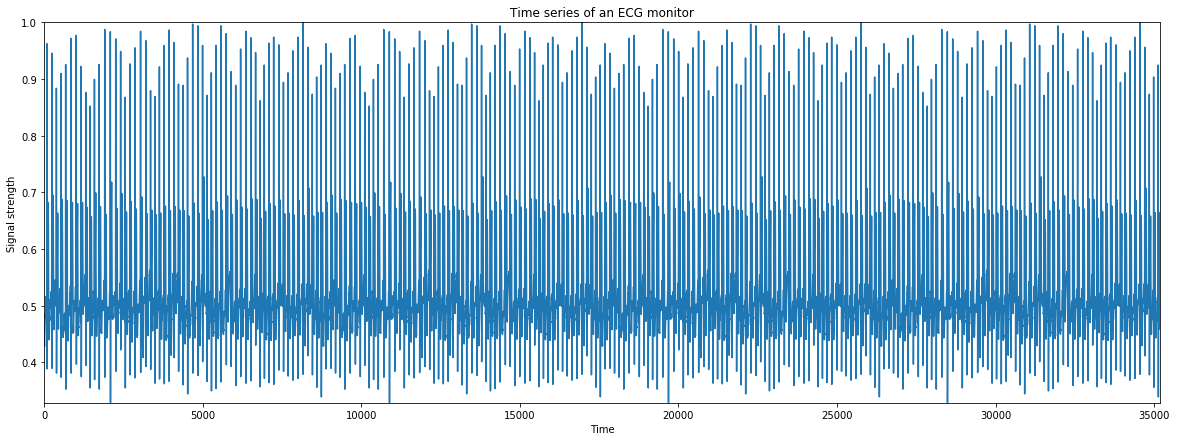

In [6]:
dataset2 = dataset_normal
plt.figure(figsize=(20, 7))
axes1 = plt.gca()
axes1.set_xlim([0,len(dataset2)])
axes1.set_ylim([min(dataset2),max(dataset2)])
plt.plot(dataset2)
plt.title("Time series of an ECG monitor")
plt.xlabel('Time')
plt.ylabel('Signal strength')

In [15]:
# split into train and test set
#dataset = np.append(np.append(np.append(np.append(disease_person_2,disease_person_2),disease_person_2),disease_person_2),disease_person_2)
dataset = disease_person_2[:600]

train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

#reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
from keras.callbacks import EarlyStopping

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape=(1, look_back)))
#model.add(Dropout(0.2))
model.add(LSTM(4, return_sequences=True, input_shape=(1, look_back)))
#model.add(Dropout(0.2))
model.add(LSTM(4, return_sequences=True, input_shape=(1, look_back)))
#model.add(Dropout(0.2))
model.add(LSTM(4, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(4, name='layer_n'))
model.add(Dense(1, name='dense_1'))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.save_weights('offline_weights.h5')

#earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=8, verbose=1, mode='auto')
#callbacks_list = [earlystop]

print("Please wait, fitting model...")
start = time.time()
history = model.fit(trainX, trainY, validation_split=0.3, epochs=100, batch_size=1, verbose=2)
end = time.time()
print("Training complete.")
time_taken = end - start
print('Total time taken: %.2f seconds' % (time_taken))

Please wait, fitting model...
Train on 292 samples, validate on 126 samples
Epoch 1/100
2s - loss: 0.1001 - val_loss: 0.0110
Epoch 2/100
1s - loss: 0.0043 - val_loss: 0.0124
Epoch 3/100
1s - loss: 0.0042 - val_loss: 0.0132
Epoch 4/100
1s - loss: 0.0042 - val_loss: 0.0081
Epoch 5/100
1s - loss: 0.0042 - val_loss: 0.0113
Epoch 6/100
1s - loss: 0.0042 - val_loss: 0.0085
Epoch 7/100
1s - loss: 0.0043 - val_loss: 0.0092
Epoch 8/100
1s - loss: 0.0042 - val_loss: 0.0113
Epoch 9/100
1s - loss: 0.0041 - val_loss: 0.0084
Epoch 10/100
1s - loss: 0.0042 - val_loss: 0.0107
Epoch 11/100
1s - loss: 0.0041 - val_loss: 0.0113
Epoch 12/100
1s - loss: 0.0041 - val_loss: 0.0101
Epoch 13/100
1s - loss: 0.0041 - val_loss: 0.0085
Epoch 14/100
1s - loss: 0.0041 - val_loss: 0.0099
Epoch 15/100
1s - loss: 0.0039 - val_loss: 0.0068
Epoch 16/100
1s - loss: 0.0039 - val_loss: 0.0060
Epoch 17/100
1s - loss: 0.0039 - val_loss: 0.0110
Epoch 18/100
1s - loss: 0.0038 - val_loss: 0.0079
Epoch 19/100
1s - loss: 0.0037 - 

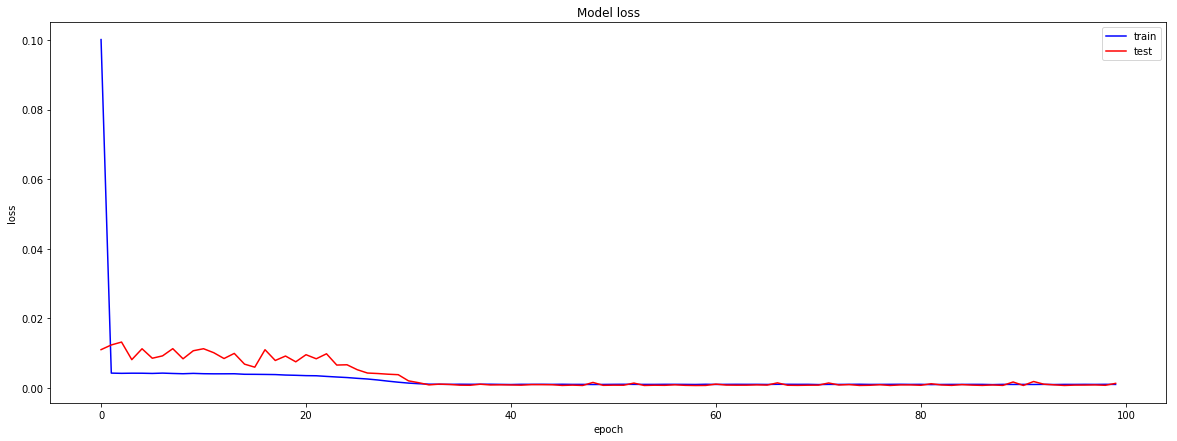

In [17]:
plt.figure(figsize=(20, 7))
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

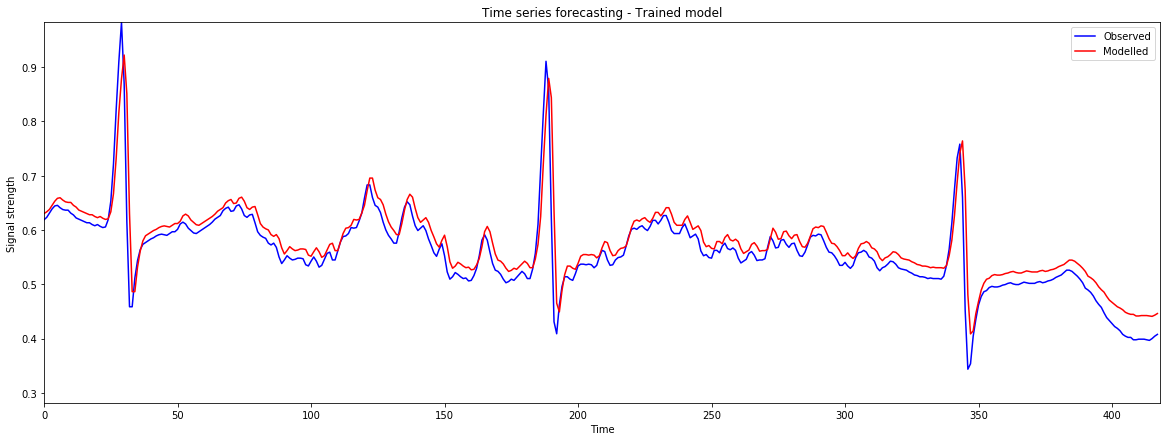

In [18]:
trainPredict = model.predict(trainX)
plt.figure(figsize=(20, 7))
axes = plt.gca()
axes.set_xlim([0,len(trainPredict)])
axes.set_ylim([min(dataset),max(dataset)])
label_a = "Observed"
label_b = "Modelled"
plt.plot(trainY, 'b', label=label_a)
plt.plot(trainPredict, 'r', label=label_b)
plt.title("Time series forecasting - Trained model")
plt.xlabel('Time')
plt.ylabel('Signal strength')
plt.legend(loc='best')
plt.show()

#Forecasting is clearly not invariant to randomly shuffling the order of the signals

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.4f RMSE' % (testScore))

Train Score: 0.0346 RMSE
Test Score: 0.0369 RMSE


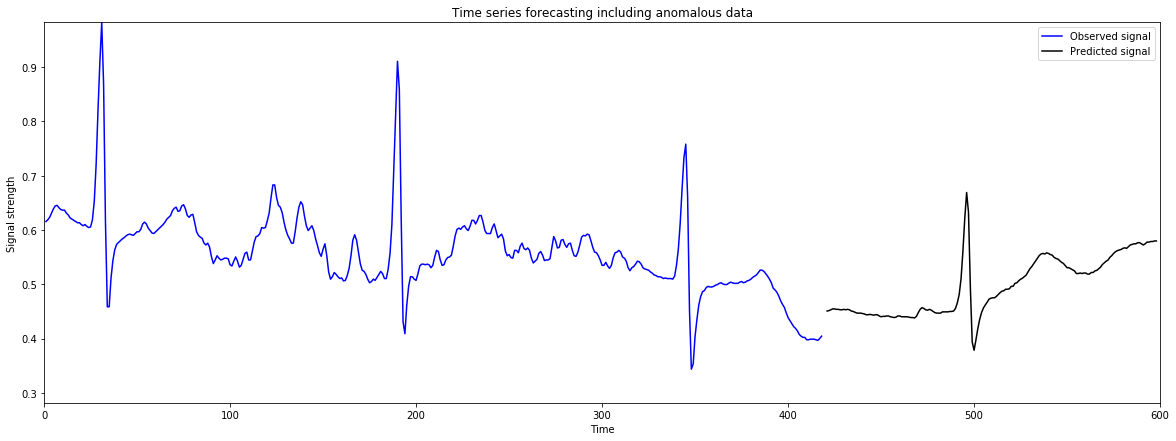

In [20]:
# shift train predictions for plotting
train_X = np.reshape(trainX, (trainX.shape[0], 1))
test_X = np.reshape(testX, (testX.shape[0], 1))

trainPlot = np.zeros((len(dataset), 1))
trainPlot[:,:] = np.nan
trainPlot[look_back:len(trainX)+look_back, :] = train_X
# shift test predictions for plotting
testPredictPlot = np.zeros((len(dataset), 1))
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainX)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.figure(figsize=(20, 7))
axes1 = plt.gca()
axes1.set_xlim([0,len(dataset)])
axes1.set_ylim([min(dataset),max(dataset)])
label1 = "Observed signal"
label2 = "Predicted signal"
plt.plot(trainPlot, 'b', label=label1)
plt.plot(testPredictPlot, 'k', label=label2)
plt.title("Time series forecasting including anomalous data")
plt.xlabel('Time')
plt.ylabel('Signal strength')
plt.legend(loc='best')
plt.show()

In [ ]:
testPredict1 = mode

# Save offline model:

In [13]:
print("Saving model...")
model.save('model_offline.h5')
del model
print("Model saved to disk.")

Saving model...
Model saved to disk.


# Begin online learning

In [14]:
# split into train and test set
online_in = 0
online_out = online_in + 2
dataset_online = disease_person_2[online_in*150:online_out*150]

train_size_online = int(len(dataset_online) * 0.5)
test_size_online = len(dataset_online) - train_size_online

train_online, test_online = dataset_online[0:train_size_online], dataset_online[train_size_online:len(dataset_online)]

# convert an array of values into a dataset matrix using create_dataset function
look_back_online = 1
trainX_online, trainY_online = create_dataset(train_online, look_back_online)
testX_online, testY_online = create_dataset(test_online, look_back_online)

# reshape input to be [samples, time steps, features]
trainX_online = np.reshape(trainX_online, (trainX_online.shape[0], 1, trainX_online.shape[1]))
testX_online = np.reshape(testX_online, (testX_online.shape[0], 1, testX_online.shape[1]))

# Train and fit online model:

Save online model for online transfer learning.

In [15]:
from keras.callbacks import ModelCheckpoint

count = 0

model_online = Sequential()
model_online.add(LSTM(100, return_sequences=True, input_shape=(1, look_back_online)))
model_online.add(LSTM(100))
model_online.add(Dense(1, name='dense_1'))
model_online.load_weights('offline_weights.h5', by_name=True)
model_online.compile(loss='mean_squared_error', optimizer='adam')

#checkpoint
outputFolder = './output_ecg'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)   
    
filepath = outputFolder+"/weights-{epoch:02d}-{val_loss:.2f}"+str(count)+".hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True, 
                             mode='auto', period=1)
callbacks_list = [checkpoint]
print("Please wait, fitting online model...")
history = model_online.fit(trainX_online, trainY_online, validation_split=0.5, callbacks=callbacks_list, epochs=1, batch_size=1, verbose=2)
print("Training complete.")

Please wait, fitting online model...
Train on 74 samples, validate on 74 samples
Epoch 1/1
Epoch 00000: saving model to ./output_ecg/weights-00-0.000.hdf5
0s - loss: 0.1027 - val_loss: 6.9275e-04
Training complete.


In [16]:
History_loss = np.array([])
History_val_loss = np.array([])
History_loss = np.append(History_loss, history.history['loss'])
History_val_loss = np.append(History_val_loss, history.history['val_loss'])

In [17]:
# make online prediction
trainPredict_online = model_online.predict(trainX_online)
testPredict_online = model_online.predict(testX_online)

trainScore_online = math.sqrt(mean_squared_error(trainY_online, trainPredict_online))
print('Train Score online: %.4f RMSE' % (trainScore_online))
testScore_online = math.sqrt(mean_squared_error(testY_online, testPredict_online))
print('Test Score onnline: %.4f RMSE' % (testScore_online))

Train Score online: 0.0468 RMSE
Test Score onnline: 0.0385 RMSE


In [18]:
Train_Score_online = np.array([])
Test_Score_online = np.array([])
Train_Score_online = np.append(Train_Score_online, trainScore_online)
Test_Score_online = np.append(Test_Score_online, testScore_online)

In [19]:
train_X_online = np.reshape(trainX_online, (trainX_online.shape[0], 1))
test_X_online = np.reshape(testX_online, (testX_online.shape[0], 1))

# Load offline model and evaluate current data:

In [20]:
from keras.models import load_model
print("Evaluating offline model...")

start = time.time()
model = load_model('model_offline.h5')
testPredict_offline = model.predict(testX_online)
end = time.time()
time_taken = end - start
print('... Evalutation complete. Time taken: %.2f seconds' % (time_taken))

Evaluating offline model...
... Evalutation complete. Time taken: 5.91 seconds


In [21]:
# make online prediction
testPredict_offline = model.predict(testX_online)

testScore_offline = math.sqrt(mean_squared_error(testY_online, testPredict_offline))
print('Test Score offline: %.4f RMSE' % (testScore_offline))

Test Score offline: 0.0323 RMSE


# Forecast future online time series:

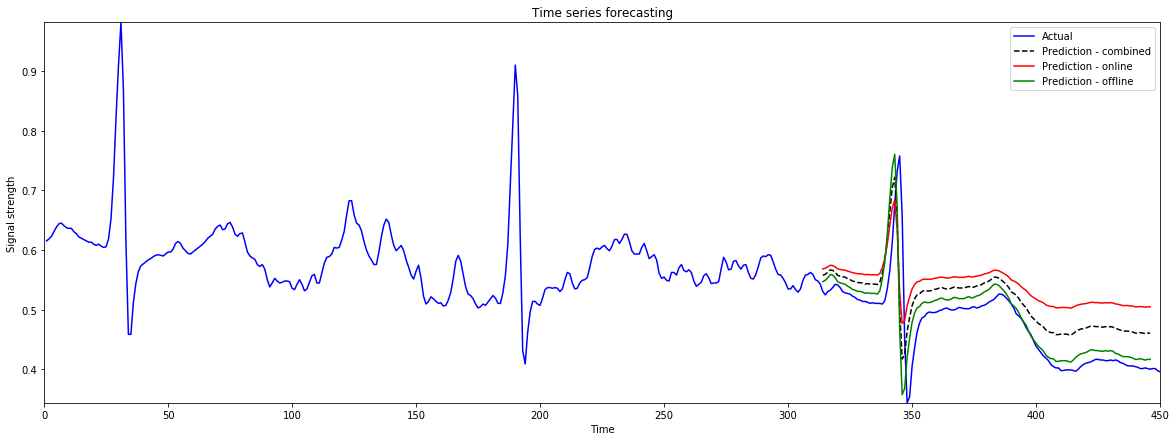

Note: Actual signal received after predctions made.
      Weighting between online and offline model can then be adjusted.


In [15]:
testPredict_combined = np.zeros(testPredict_offline.shape)
alpha = 0.5

for i in range(len(testPredict_offline)):
    testPredict_combined[i] = alpha * testPredict_offline[i] + (1 - alpha) * testPredict_online[i]
    
trainPlot_online = np.zeros((len(dataset_online)+look_back_online, 1))
trainPlot_online[:,:] = np.nan
dataset_online = np.reshape(dataset_online, (dataset_online.shape[0], 1))
trainPlot_online[look_back_online:len(dataset_online)+look_back_online, :] = dataset_online

testPredictPlot1_online = np.zeros((len(dataset_online), 1))
testPredictPlot1_online[:,:] = np.nan
testPredictPlot1_online[len(trainX_online)+1:len(trainX_online)+1+len(testPredict_online), :] = testPredict_combined

testPredictPlot2_online = np.zeros((len(dataset_online), 1))
testPredictPlot2_online[:,:] = np.nan
testPredictPlot2_online[len(trainX_online)+1:len(trainX_online)+1+len(testPredict_online), :] = testPredict_online

testPredictPlot_offline = np.zeros((len(dataset_online), 1))
testPredictPlot_offline[:,:] = np.nan
testPredictPlot_offline[len(trainX_online)+1:len(trainX_online)+1+len(testPredict_online), :] = testPredict_offline

plt.figure(figsize=(20,7))
axes1 = plt.gca()
axes1.set_xlim([0,len(dataset_online)])
axes1.set_ylim([min(dataset_online),max(dataset_online)])
label1 = "Actual"
label2 = "Prediction - combined"
label4 = "Prediction - online"
label5 = "Prediction - offline"
plt.plot(trainPlot_online, 'b', label=label1)
plt.plot(testPredictPlot1_online, 'k--', label=label2)
plt.plot(testPredictPlot2_online, 'r', label=label4)
plt.plot(testPredictPlot_offline, 'g', label=label5)
plt.title("Time series forecasting")
plt.xlabel("Time")
plt.ylabel("Signal strength")
plt.legend(loc='best')
plt.show()
print("Note: Actual signal received after predctions made.")
print("      Weighting between online and offline model can then be adjusted.")

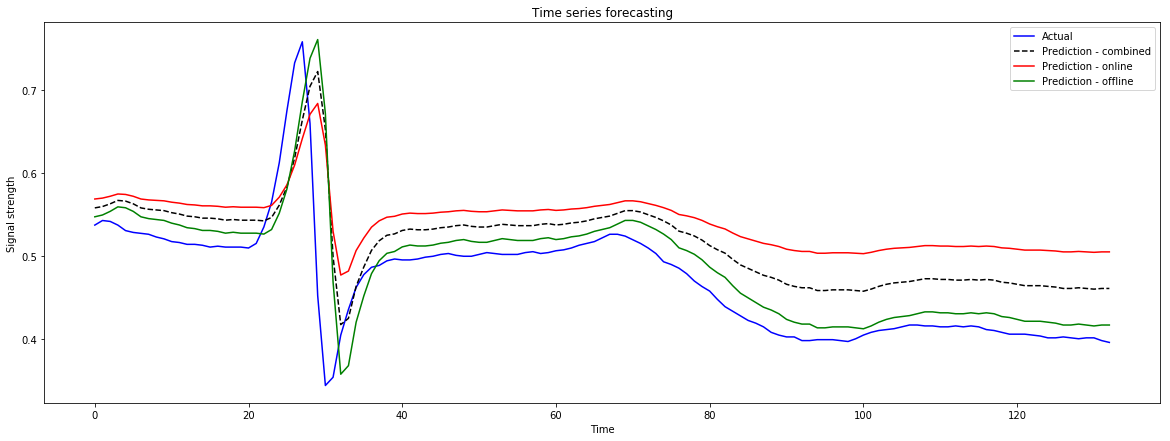

In [16]:
Set1_actual = dataset_online[len(dataset_online) - len(testPredict_combined):len(dataset_online),:]
Set1_combined = testPredict_combined
Set1_online = testPredict_online
Set1_offline = testPredict_offline

plt.figure(figsize=(20,7))

label1 = "Actual"
label2 = "Prediction - combined"
label3 = "Prediction - online"
label4 = "Prediction - offline"

plt.plot(Set1_actual, 'b', label=label1)
plt.plot(Set1_combined, 'k--', label=label2)
plt.plot(Set1_online, 'r', label=label3)
plt.plot(Set1_offline, 'g', label=label4)

plt.title("Time series forecasting")
plt.xlabel("Time")
plt.ylabel("Signal strength")
plt.legend(loc='best')
plt.show()

# Received new data and transfer online model:

In [17]:
# split into train and test set

count = count + 1

online_in = online_in + 1
online_out = online_in + 3
dataset_online = disease_person_2[online_in*150:online_out*150]

train_size_online = int(len(dataset_online) * 0.7)
test_size_online = len(dataset_online) - train_size_online

train_online, test_online = dataset_online[0:train_size_online], dataset_online[train_size_online:len(dataset_online)]

# convert an array of values into a dataset matrix using create_dataset function
look_back_online = 1
trainX_online, trainY_online = create_dataset(train_online, look_back_online)
testX_online, testY_online = create_dataset(test_online, look_back_online)

# reshape input to be [samples, time steps, features]
trainX_online = np.reshape(trainX_online, (trainX_online.shape[0], 1, trainX_online.shape[1]))
testX_online = np.reshape(testX_online, (testX_online.shape[0], 1, testX_online.shape[1]))

# Transfer weights from previous online model and retrain on current online data:

In [18]:
# Recall model
model_online = Sequential()
model_online.add(LSTM(100, return_sequences=True, input_shape=(1, look_back_online)))
model_online.add(LSTM(100))
model_online.add(Dense(1, name='dense_1'))


# load weights
import glob
epoch_num = 0
if count > 1:
    outputFolder = './output_ecg'+str(np.argmin(Test_Score_online))
else:
    outputFolder = './output_ecg'+str(count)
    
file_ini = outputFolder+'/weights-'+str(epoch_num)+'*'
filename = glob.glob(file_ini)
if os.path.isfile(filename[0]):
    model_online.load_weights(file_ini)
else:
    print "%s does not exist" % filename[0]

model_online.compile(loss='mean_squared_error', optimizer='adam')

#checkpoint
outputFolder = './output_ecg'+str(count+1)
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)   
    
filepath = outputFolder+"/weights-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True, 
                             mode='auto', period=1)
callbacks_list = [checkpoint]
print("Please wait, fitting online model...")
history = model_online.fit(trainX_online, trainY_online, validation_split=0.3, callbacks=callbacks_list, epochs=1, batch_size=1, verbose=2)
print("Training complete.")

IndexError: list index out of range

In [19]:
file_ini

'./output_ecg1/weights-0*'

In [20]:
filename

[]

In [30]:
# make online prediction
trainPredict_online = model_online.predict(trainX_online)
testPredict_online = model_online.predict(testX_online)

trainScore_online = math.sqrt(mean_squared_error(trainY_online, trainPredict_online))
print('Train Score online: %.2f RMSE' % (trainScore_online))
testScore_online = math.sqrt(mean_squared_error(testY_online, testPredict_online))
print('Test Score onnline: %.2f RMSE' % (testScore_online))

Train Score online: 0.52 RMSE
Test Score onnline: 0.49 RMSE


In [185]:
train_X_online = np.reshape(trainX_online, (trainX_online.shape[0], 1))
test_X_online = np.reshape(testX_online, (testX_online.shape[0], 1))

# Load offline model and evaluate current data:

In [186]:
from keras.models import load_model
print("Evaluating offline model...")

start = time.time()
model = load_model('model_ecg.h5')
testPredict_offline = model.predict(testX_online)
end = time.time()
time_taken = end - start
print('... Evalutation complete. Time taken: %.2f seconds' % (time_taken))

Evaluating offline model...
... Evalutation complete. Time taken: 19.03 seconds


# Forecast future online time series:

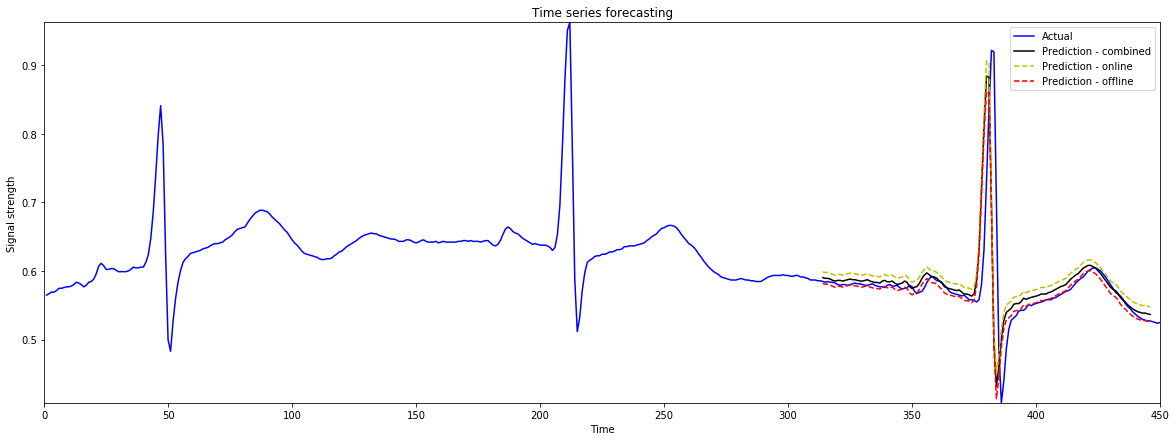

Note: Actual signal received after predctions made.
      Weighting between online and offline model can then be adjusted.


In [187]:
testPredict_combined = np.zeros(testPredict_offline.shape)
alpha = 0.5

for i in range(len(testPredict_offline)):
    testPredict_combined[i] = alpha * testPredict_offline[i] + (1 - alpha) * testPredict_online[i]
    
trainPlot_online = np.zeros((len(dataset_online)+look_back_online, 1))
trainPlot_online[:,:] = np.nan
dataset_online = np.reshape(dataset_online, (dataset_online.shape[0], 1))
trainPlot_online[look_back_online:len(dataset_online)+look_back_online, :] = dataset_online

testPredictPlot1_online = np.zeros((len(dataset_online), 1))
testPredictPlot1_online[:,:] = np.nan
testPredictPlot1_online[len(trainX_online)+1:len(trainX_online)+1+len(testPredict_online), :] = testPredict_combined

testPredictPlot2_online = np.zeros((len(dataset_online), 1))
testPredictPlot2_online[:,:] = np.nan
testPredictPlot2_online[len(trainX_online)+1:len(trainX_online)+1+len(testPredict_online), :] = testPredict_online

testPredictPlot_offline = np.zeros((len(dataset_online), 1))
testPredictPlot_offline[:,:] = np.nan
testPredictPlot_offline[len(trainX_online)+1:len(trainX_online)+1+len(testPredict_online), :] = testPredict_offline

plt.figure(figsize=(20,7))
axes1 = plt.gca()
axes1.set_xlim([0,len(dataset_online)])
axes1.set_ylim([min(dataset_online),max(dataset_online)])
label1 = "Actual"
label2 = "Prediction - combined"
label4 = "Prediction - online"
label5 = "Prediction - offline"
plt.plot(trainPlot_online, 'b', label=label1)
plt.plot(testPredictPlot1_online, 'k', label=label2)
plt.plot(testPredictPlot2_online, 'y--', label=label4)
plt.plot(testPredictPlot_offline, 'r--', label=label5)
plt.title("Time series forecasting")
plt.xlabel("Time")
plt.ylabel("Signal strength")
plt.legend(loc='best')
plt.show()
print("Note: Actual signal received after predctions made.")
print("      Weighting between online and offline model can then be adjusted.")

In [301]:
dataset = disease_person_3
Dataset = 'disease_person_3'

In [302]:
signal_num = 2
if Dataset == 'healthy_person_1':
    signal_length = 160
    print(Dataset)
if Dataset == 'healthy_person_2':
    signal_length = 190
    print(Dataset)
if Dataset == 'healthy_person_3':
    signal_length = 130
    print(Dataset)
if Dataset == 'healthy_person_4':
    signal_length = 170
    print(Dataset)
if Dataset == 'disease_person_1':
    signal_length = 160
    print(Dataset) 
if Dataset == 'disease_person_2':
    signal_length = 160
    print(Dataset) 
if Dataset == 'disease_person_3':
    signal_length = 148
    print(Dataset)
if Dataset == 'Sine wave':
    signal_length = 21
    print(Dataset)
if Dataset == 'cpu_1':
    signal_length = 150
    print(Dataset)
if Dataset == 'cpu_2':
    signal_length = 10
    print(Dataset)

disease_person_3


<IPython.core.display.Javascript object>


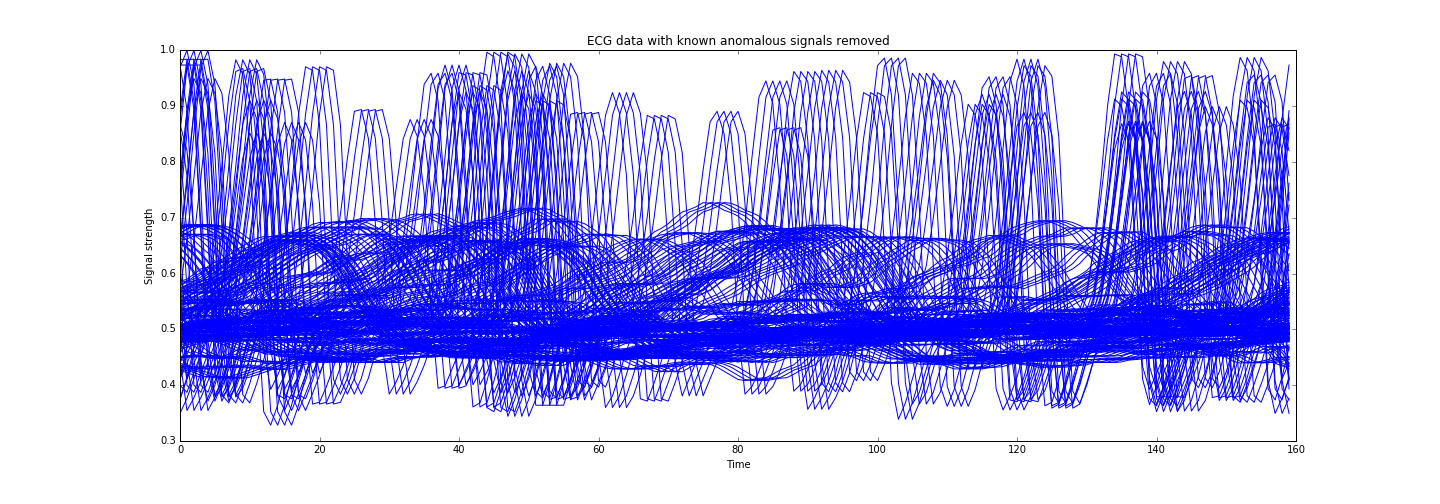

In [303]:
num_training_samples = int(len(dataset_normal) / 160)
Dataset_normal = dataset_normal[:num_training_samples * 160]
Training_ecg = np.reshape(Dataset_normal, (-1, 160))

plt.figure(figsize=(20, 7))
plt.plot(Training_ecg.T, 'b')
plt.title("ECG data with known anomalous signals removed")
plt.xlabel('Time')
plt.ylabel('Signal strength')
#axes1 = plt.gca()
#axes1.set_xlim([0,149])
#axes1.set_ylim([min(dataset_normal),max(dataset_normal)])
plt.show()

In [205]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
h2o.init()

train_ecg = h2o.H2OFrame(Training_ecg) #train on data with anomalies removed

model = H2OAutoEncoderEstimator( 
        activation="Tanh", 
        hidden=[100], 
        l1=1e-4,
        score_interval=0,
        epochs=100
)

model.train(x=train_ecg.names, training_frame=train_ecg)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 58 mins
H2O cluster version:,3.15.0.4022
H2O cluster version age:,8 months and 17 days !!!
H2O cluster name:,H2O_from_python_craig_qatp4o
H2O cluster total nodes:,1
H2O cluster free memory:,1.079 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [317]:
threshold = 0.005

Anomalies = []
Non_anomalies = []
buffer1 = np.zeros(signal_length)
buffer1[:] = np.nan

MSE_anom = np.zeros([len(dataset)/signal_length,2])
MSE_anom[:,:] = np.nan
MSE_non_anom = MSE_anom

In [318]:
for i in range(len(dataset)/signal_length):
    Predicted_ecg = dataset[i*signal_length:(i+1)*signal_length]
    Predicted_ecg = np.reshape(Predicted_ecg, (-1,signal_length))
    
    test_ecg = h2o.H2OFrame(Predicted_ecg) #test using predicted time series
    reconstruction_error = model.anomaly(test_ecg)
    df = reconstruction_error.as_data_frame()
    #df['Rank'] = df['Reconstruction.MSE'].rank(ascending=False)
    #df_sorted = df.sort_values('Rank')
    
    #anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] > threshold ]
    #not_anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] < threshold ]
    Predictions = np.reshape(Predicted_ecg, (Predicted_ecg.shape[1]))
    if df.values[0,0] > threshold:
        Anomalies = np.append(Anomalies,Predictions)
        Non_anomalies = np.append(Non_anomalies,buffer1)
        MSE_anom[i,:] = [np.int(i),df.values[0,0]]
        print MSE_anom[i,:]
        print 'Anomalous'
    else:
        Non_anomalies = np.append(Non_anomalies,Predictions)
        Anomalies = np.append(Anomalies,buffer1)
        MSE_non_anom[i,:] = [np.int(i),df.values[0,0]]
        print MSE_non_anom[i,:]
        print 'Non-anomalous'

Parse progress: |█████████████████████████████████████████████████████████| 100%
[ 0.          0.00092146]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[ 1.          0.00119214]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  2.00000000e+00   1.98289468e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  3.00000000e+00   2.29007741e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  4.00000000e+00   1.17930877e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  5.00000000e+00   1.44638667e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.00000000e+00   2.06746295e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  7.00000000e+00   1.

[  6.20000000e+01   6.61862483e-04]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.30000000e+01   1.54989052e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.40000000e+01   9.42814992e-04]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.50000000e+01   1.69605543e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.60000000e+01   2.96587044e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.70000000e+01   1.38943032e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.80000000e+01   9.55452581e-04]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  6.90000000e+01   9.42084553e-04]
Non-anomalous
Parse progress: |████████████████

Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.25000000e+02   1.14905687e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.26000000e+02   1.72925056e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.27000000e+02   1.15531490e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.28000000e+02   7.16192953e-04]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.29000000e+02   9.31743373e-04]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.30000000e+02   1.46279593e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[  1.31000000e+02   1.11344175e-03]
Non-anomalous
Parse progress: |█████████████████████████████████████████████████████████| 100%
[ 

<IPython.core.display.Javascript object>


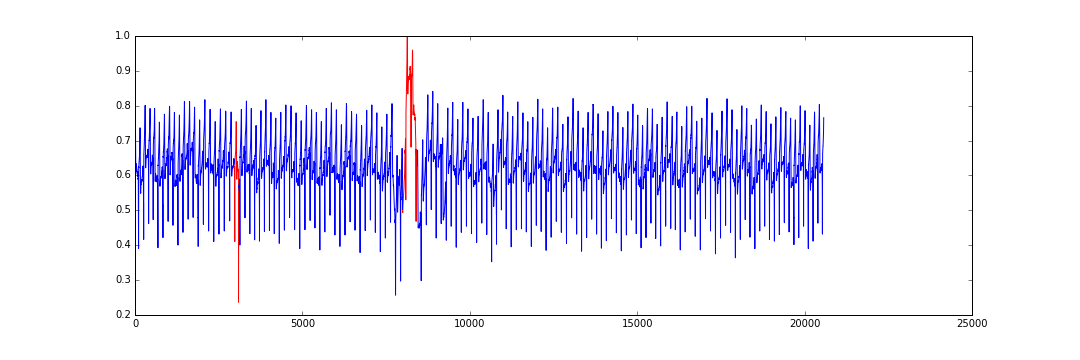

In [319]:
plt.figure(figsize=(15,5))
plt.plot(Anomalies, 'r', linewidth=1)
plt.plot(Non_anomalies, 'b')
plt.show()

<IPython.core.display.Javascript object>


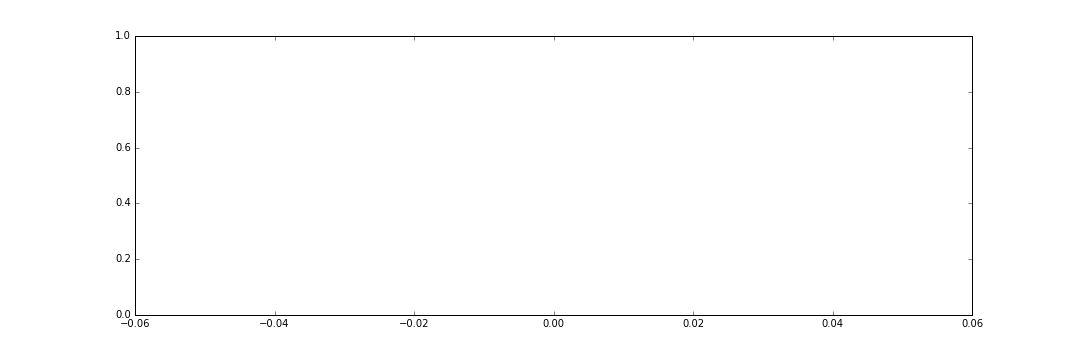

KeyboardInterrupt: 

In [299]:
%matplotlib notebook
plt.figure(figsize=(15,5))
fig = plt.gcf()
fig.show()
fig.canvas.draw()
rate = 50

for i in range(len(dataset)):
    plt.plot(Non_anomalies[rate*i:rate*i+signal_length], 'b')
    plt.plot(Anomalies[rate*i:rate*i+signal_length], 'r')
    plt.ylim([0,1])
    #plt.xlim([i,signal_length+i])
    fig.canvas.draw()
    plt.clf()

In [151]:
testPredict_combined = disease_person_1[:160]

In [170]:
testPredict_combined.T.shape

(160,)

# Begin anomaly detection on time-series predictions:

Note: anomlay detection will be performed at every time-step on the data stream.

In [153]:
if testPredict_combined.shape[0]>=160:
    num_predicted_samples = int(len(testPredict_combined) / 160)
    TestPredict = testPredict_combined[:num_predicted_samples * 160]
    Predicted_ecg = np.reshape(TestPredict, (-1,160))
else:
    Predicted_ecg = testPredict_combined.T

In [154]:
Predicted_ecg.shape

(1, 160)

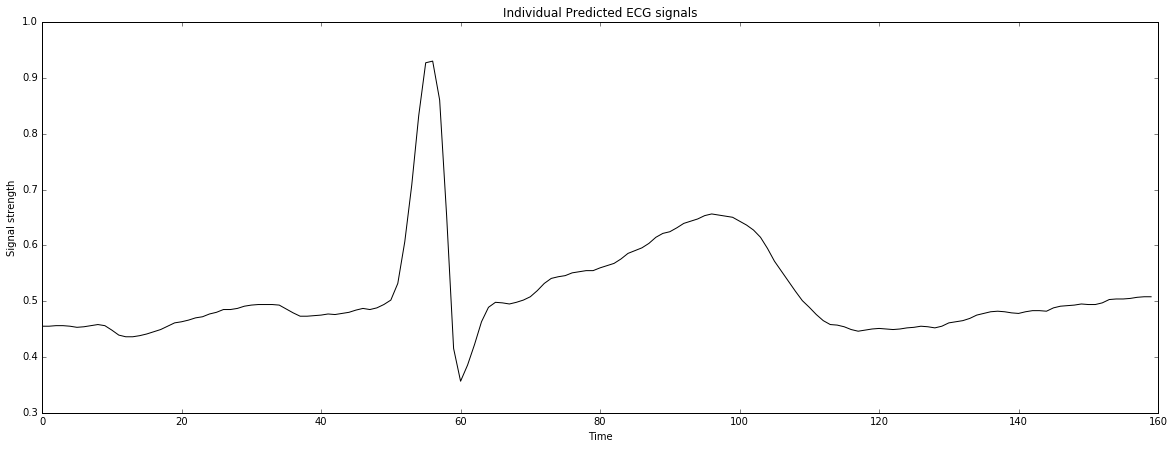

In [155]:
plt.figure(figsize=(20, 7))
plt.plot(Predicted_ecg.T, 'k')
plt.title("Individual Predicted ECG signals")
plt.xlabel('Time')
plt.ylabel('Signal strength')
#axes1 = plt.gca()
#axes1.set_xlim([0,149])
#axes1.set_ylim([min(dataset),max(dataset)])
plt.show()

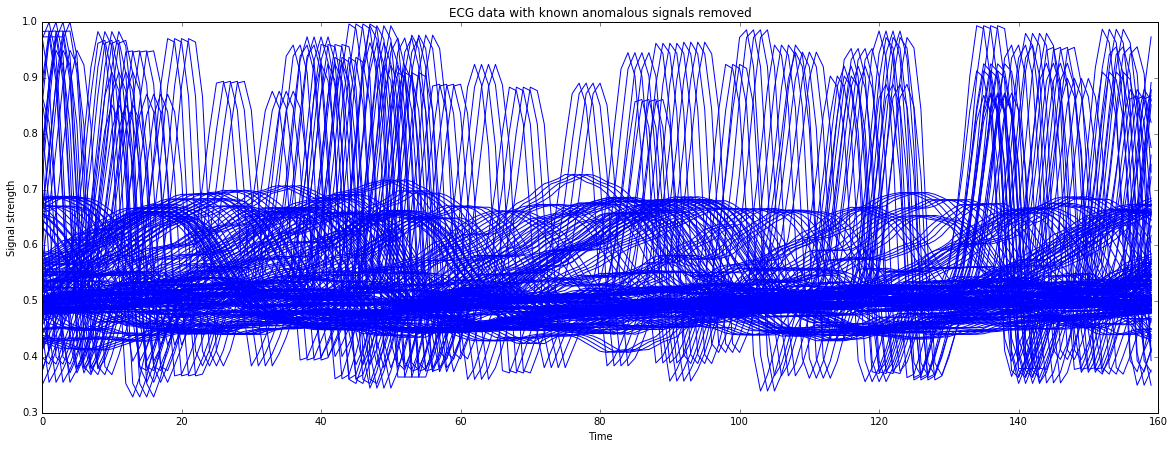

In [30]:
num_training_samples = int(len(dataset_normal) / 160)
Dataset_normal = dataset_normal[:num_training_samples * 160]
Training_ecg = np.reshape(Dataset_normal, (-1, 160))

plt.figure(figsize=(20, 7))
plt.plot(Training_ecg.T, 'b')
plt.title("ECG data with known anomalous signals removed")
plt.xlabel('Time')
plt.ylabel('Signal strength')
#axes1 = plt.gca()
#axes1.set_xlim([0,149])
#axes1.set_ylim([min(dataset_normal),max(dataset_normal)])
plt.show()

In [31]:
Training_ecg.shape

(219, 160)

In [32]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,13 mins 26 secs
H2O cluster version:,3.15.0.4022
H2O cluster version age:,8 months and 17 days !!!
H2O cluster name:,H2O_from_python_craig_qatp4o
H2O cluster total nodes:,1
H2O cluster free memory:,1.088 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [68]:
train_ecg = h2o.H2OFrame(Training_ecg) #train on data with anomalies removed

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
model = H2OAutoEncoderEstimator( 
        activation="Tanh", 
        hidden=[100], 
        l1=1e-4,
        score_interval=0,
        epochs=100
)

model.train(x=train_ecg.names, training_frame=train_ecg)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [125]:
#Predicted_ecg = Predicted_ecg[0,:]

In [156]:
test_ecg = h2o.H2OFrame(Predicted_ecg) #test using predicted time series
reconstruction_error = model.anomaly(test_ecg)
df = reconstruction_error.as_data_frame()
df['Rank'] = df['Reconstruction.MSE'].rank(ascending=False)
df_sorted = df.sort_values('Rank')

Parse progress: |█████████████████████████████████████████████████████████| 100%


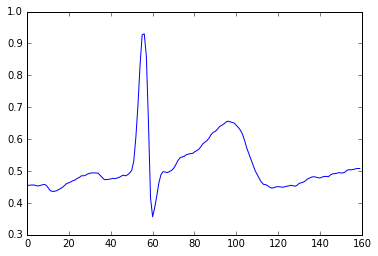

In [158]:
plt.plot(Predicted_ecg.T)
plt.show()

In [159]:
RMSE = df_sorted.values[:,0]
if df_sorted.shape[0]>1:
    threshold = np.mean(RMSE) + 1 * np.std(RMSE)
else:
    threshold = 0.0001

threshold = 0.0025

In [160]:
anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] > threshold ]
not_anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] < threshold ]

In [161]:
Predicted_ecg.shape

(1, 160)

In [162]:
not_anomalies.sort_index(ascending=True)

,Reconstruction.MSE,Rank
0,0.000225,1.0


In [163]:
anomalous = Predicted_ecg[anomalies.index].T

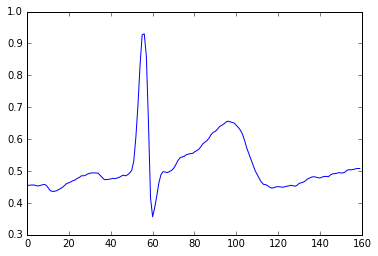

In [164]:
plt.plot(np.ravel(Predicted_ecg))
plt.show()

In [165]:
Data = Predicted_ecg
signal_length = 160
length = Data.shape[0] * Data.shape[1]

Data_not_anomalies = np.zeros(Data.shape)
Data_anomalies = np.zeros(Data.shape)
Data_not_anomalies[:,:] = np.nan
Data_anomalies[:,:] = np.nan
Reconstructed_Normal = np.zeros(Predicted_ecg.shape[0] * Predicted_ecg.shape[1])
Reconstructed_Normal[:] = np.nan
Reconstructed_Anomalies = np.zeros(Predicted_ecg.shape[0] * Predicted_ecg.shape[1])
Reconstructed_Anomalies[:] = np.nan

if not_anomalies.shape[0] > 0:
    Data_not_anomalies[not_anomalies.index, :] = Data[not_anomalies.index, :]
    Reconstructed_Normal = np.zeros(Predicted_ecg.shape[0] * Predicted_ecg.shape[1])
    Reconstructed_Normal[:] = np.nan
    for i in range(Predicted_ecg.shape[0]):
        Reconstructed_Normal[signal_length*i : signal_length*(i+1)] = Data_not_anomalies[i,:]
else:
    print("Only anomalies predicted at current threshold.")
    
if anomalies.shape[0] > 0:
    Data_anomalies[anomalies.index, :] = Data[anomalies.index, :]
    Reconstructed_Anomalies = np.zeros(Predicted_ecg.shape[0] * Predicted_ecg.shape[1])
    Reconstructed_Anomalies[:] = np.nan
    for i in range(Predicted_ecg.shape[0]):
        Reconstructed_Anomalies[signal_length*i : signal_length*(i+1)] = Data_anomalies[i,:]
else:
    print("No anomalies predicted at current threshold.")

No anomalies predicted at current threshold.


In [166]:
Data.shape

(1, 160)

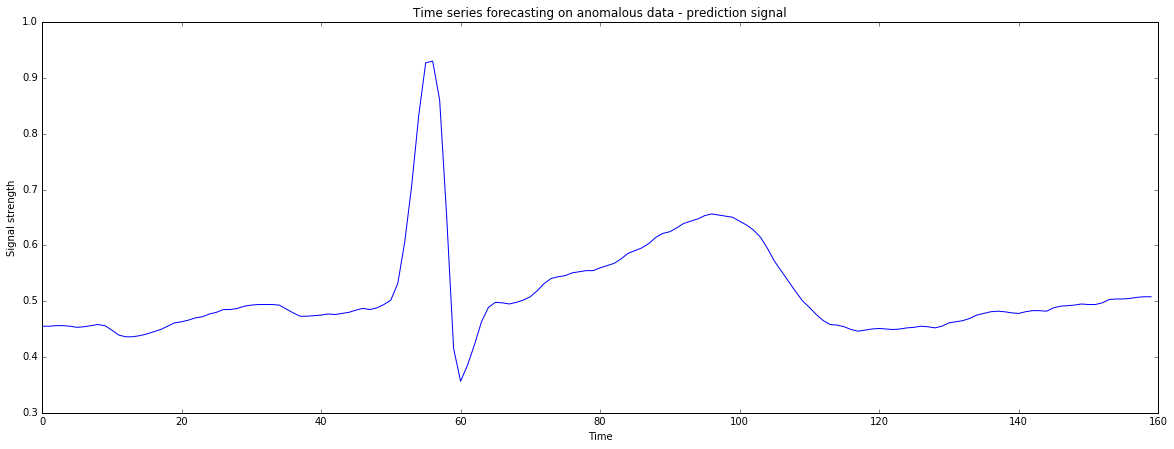

In [167]:
plt.figure(figsize=(20, 7))
plt.plot(Reconstructed_Normal, 'b')
plt.plot(Reconstructed_Anomalies, 'r')
#axes2 = plt.gca()
#axes2.set_xlim([0, Predicted_ecg.shape[0] * Predicted_ecg.shape[1]])
#axes2.set_ylim([min(dataset),max(dataset)])
plt.title("Time series forecasting on anomalous data - prediction signal")
plt.xlabel('Time')
plt.ylabel('Signal strength') 
plt.show()